In [67]:
import pandas as pd
import numpy as np
import os

In [68]:
attack_df = pd.read_csv('attack_samples_1sec.csv')

# Basic exploration
print("Dataset shape:", attack_df.shape)
print("\nFirst few rows:")
attack_df.head()

Dataset shape: (90391, 94)

First few rows:


,device_name,device_mac,label_full,label1,label2,label3,label4,timestamp,timestamp_start,timestamp_end,...,network_time-delta_min,network_time-delta_std_deviation,network_ttl_avg,network_ttl_max,network_ttl_min,network_ttl_std_deviation,network_window-size_avg,network_window-size_max,network_window-size_min,network_window-size_std_deviation
0,edge1,dc:a6:32:dc:27:d4,attack_ddos_syn-flood-port-80_edge1,attack,ddos,syn-flood-port-80,ddos_syn-flood-port-80,2025-01-23T15:31:10.709000Z_2025-01-23T15:31:1...,2025-01-23T15:31:10.709000Z,2025-01-23T15:31:11.709000Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,edge1,dc:a6:32:dc:27:d4,attack_ddos_syn-flood-port-80_edge1,attack,ddos,syn-flood-port-80,ddos_syn-flood-port-80,2025-01-23T15:31:11.709000Z_2025-01-23T15:31:1...,2025-01-23T15:31:11.709000Z,2025-01-23T15:31:12.709000Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,edge1,dc:a6:32:dc:27:d4,attack_ddos_syn-flood-port-80_edge1,attack,ddos,syn-flood-port-80,ddos_syn-flood-port-80,2025-01-23T15:31:12.709000Z_2025-01-23T15:31:1...,2025-01-23T15:31:12.709000Z,2025-01-23T15:31:13.709000Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,edge1,dc:a6:32:dc:27:d4,attack_ddos_syn-flood-port-80_edge1,attack,ddos,syn-flood-port-80,ddos_syn-flood-port-80,2025-01-23T15:31:13.709000Z_2025-01-23T15:31:1...,2025-01-23T15:31:13.709000Z,2025-01-23T15:31:14.709000Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,edge1,dc:a6:32:dc:27:d4,attack_ddos_syn-flood-port-80_edge1,attack,ddos,syn-flood-port-80,ddos_syn-flood-port-80,2025-01-23T15:31:14.709000Z_2025-01-23T15:31:1...,2025-01-23T15:31:14.709000Z,2025-01-23T15:31:15.709000Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
attack_df.describe()

,log_data-ranges_avg,log_data-ranges_max,log_data-ranges_min,log_data-ranges_std_deviation,log_data-types_count,log_interval-messages,log_messages_count,network_fragmentation-score,network_fragmented-packets,network_header-length_avg,...,network_time-delta_min,network_time-delta_std_deviation,network_ttl_avg,network_ttl_max,network_ttl_min,network_ttl_std_deviation,network_window-size_avg,network_window-size_max,network_window-size_min,network_window-size_std_deviation
count,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000,...,9.039100e+04,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000,90391.000000
mean,45.100032,46.179066,42.084134,1.196586,0.188238,1.263459,0.472591,1.002311,629.936498,17.323754,...,5.954859e-04,0.004105,83.046881,151.836156,50.627208,33.801977,8881.612865,26662.266564,1181.856501,8360.181516
std,190.766554,194.513330,178.428145,21.639870,0.467699,26.588833,2.312890,3.113672,1969.513598,6.810014,...,5.486585e-03,0.009395,53.638122,105.284455,32.486972,42.809158,14517.949020,30576.784541,4762.920510,11874.742964
min,0.000000,0.000000,-0.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.248000e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,2.600000e-08,0.000059,63.666667,64.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,2.700000e-08,0.000256,64.004252,119.000000,63.000000,8.952009,607.448827,5744.000000,0.000000,778.035643
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,3.400000e-08,0.003291,142.470588,255.000000,64.000000,93.964042,11093.658750,64240.000000,1024.000000,16415.272121
max,2000.000000,2000.000000,2000.000000,574.959575,2.000000,1000.000000,191.000000,10.790000,6959.000000,24.000000,...,3.105413e-01,0.176251,255.000000,255.000000,255.000000,112.506711,65535.000000,65535.000000,65535.000000,32767.500000


In [20]:
print(attack_df.columns)

Index(['device_name', 'device_mac', 'label_full', 'label1', 'label2', 'label3',
       'label4', 'timestamp', 'timestamp_start', 'timestamp_end',
       'log_data-ranges_avg', 'log_data-ranges_max', 'log_data-ranges_min',
       'log_data-ranges_std_deviation', 'log_data-types',
       'log_data-types_count', 'log_interval-messages', 'log_messages_count',
       'network_fragmentation-score', 'network_fragmented-packets',
       'network_header-length_avg', 'network_header-length_max',
       'network_header-length_min', 'network_header-length_std_deviation',
       'network_interval-packets', 'network_ip-flags_avg',
       'network_ip-flags_max', 'network_ip-flags_min',
       'network_ip-flags_std_deviation', 'network_ip-length_avg',
       'network_ip-length_max', 'network_ip-length_min',
       'network_ip-length_std_deviation', 'network_ips_all',
       'network_ips_all_count', 'network_ips_dst', 'network_ips_dst_count',
       'network_ips_src', 'network_ips_src_count', 'network_

In [21]:
# Check data types of all columns
print("Data types of each column:")
print(attack_df.dtypes)

Data types of each column:
device_name                           object
device_mac                            object
label_full                            object
label1                                object
label2                                object
                                      ...   
network_ttl_std_deviation            float64
network_window-size_avg              float64
network_window-size_max              float64
network_window-size_min              float64
network_window-size_std_deviation    float64
Length: 94, dtype: object


In [22]:
# Get a better view of data types grouped
# we want to see how many columns we have as object and how many columns we have as float / int or numeric 
# idea is to find which columns need specefic handling
print("Object columns:")
print(attack_df.select_dtypes(include='object').columns.tolist())
print(f"\nTotal: {len(attack_df.select_dtypes(include='object').columns)}")

print("\n" + "="*60)

print("\nNumeric (int/float) columns:")
print(attack_df.select_dtypes(include=['int64', 'float64']).columns.tolist())
print(f"\nTotal: {len(attack_df.select_dtypes(include=['int64', 'float64']).columns)}")

Object columns:
['device_name', 'device_mac', 'label_full', 'label1', 'label2', 'label3', 'label4', 'timestamp', 'timestamp_start', 'timestamp_end', 'log_data-types', 'network_ips_all', 'network_ips_dst', 'network_ips_src', 'network_macs_all', 'network_macs_dst', 'network_macs_src', 'network_ports_all', 'network_ports_dst', 'network_ports_src', 'network_protocols_all', 'network_protocols_dst', 'network_protocols_src']

Total: 23


Numeric (int/float) columns:
['log_data-ranges_avg', 'log_data-ranges_max', 'log_data-ranges_min', 'log_data-ranges_std_deviation', 'log_data-types_count', 'log_interval-messages', 'log_messages_count', 'network_fragmentation-score', 'network_fragmented-packets', 'network_header-length_avg', 'network_header-length_max', 'network_header-length_min', 'network_header-length_std_deviation', 'network_interval-packets', 'network_ip-flags_avg', 'network_ip-flags_max', 'network_ip-flags_min', 'network_ip-flags_std_deviation', 'network_ip-length_avg', 'network_ip-leng

In [23]:
# Check for missing values
print("Missing values check:")
missing = attack_df.isnull().sum()
missing_cols = missing[missing > 0]

if len(missing_cols) > 0:
    print("\nColumns with missing values:")
    print(missing_cols)
    print(f"\nTotal missing values: {missing.sum()}")
else:
    print("\n✓ No missing values found!")

Missing values check:

✓ No missing values found!


In [25]:
# Check for duplicate rows
print("Duplicate rows check:")
duplicates = attack_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates < 0:
     print("✓ No duplicate rows found!")
   

Duplicate rows check:
Number of duplicate rows: 0


In [34]:
#Calculer pour chaque type d'attaque ,le nombre des attacks exsistant
attack_df["label2"].value_counts()

label2
recon         33648
dos           18420
ddos          18056
mitm           8062
malware        7541
web            2796
bruteforce     1868
Name: count, dtype: int64

In [37]:
attack_df.isnull().sum().sort_values(ascending=False)


device_name                          0
device_mac                           0
label_full                           0
label1                               0
label2                               0
                                    ..
network_ttl_std_deviation            0
network_window-size_avg              0
network_window-size_max              0
network_window-size_min              0
network_window-size_std_deviation    0
Length: 94, dtype: int64

In [40]:
attack_df.duplicated().sum()

np.int64(0)

In [45]:
# Convert timestamp columns to datetime
timestamp_cols = ['timestamp_start', 'timestamp_end']
for col in timestamp_cols:
    if col in attack_df.columns:
        attack_df[col] = pd.to_datetime(attack_df[col])

attack_df.dtypes[timestamp_cols]


timestamp_start    datetime64[ns, UTC]
timestamp_end      datetime64[ns, UTC]
dtype: object

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set(style="whitegrid")


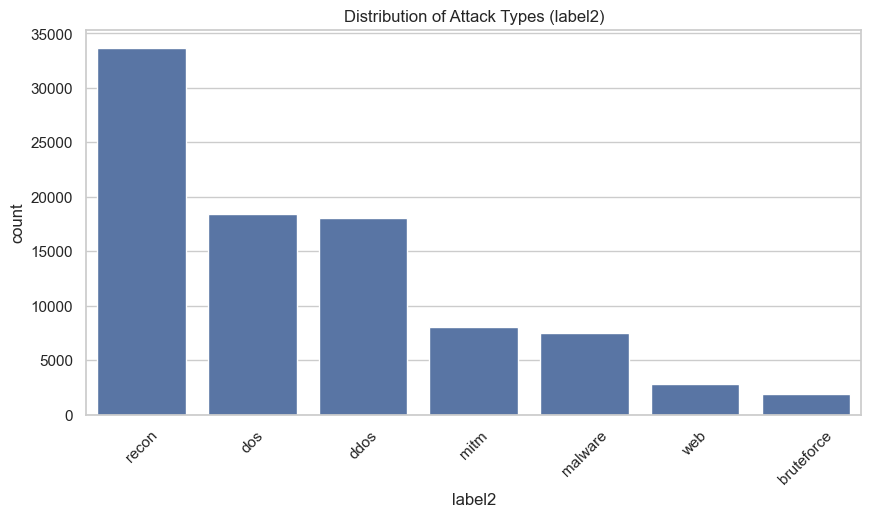

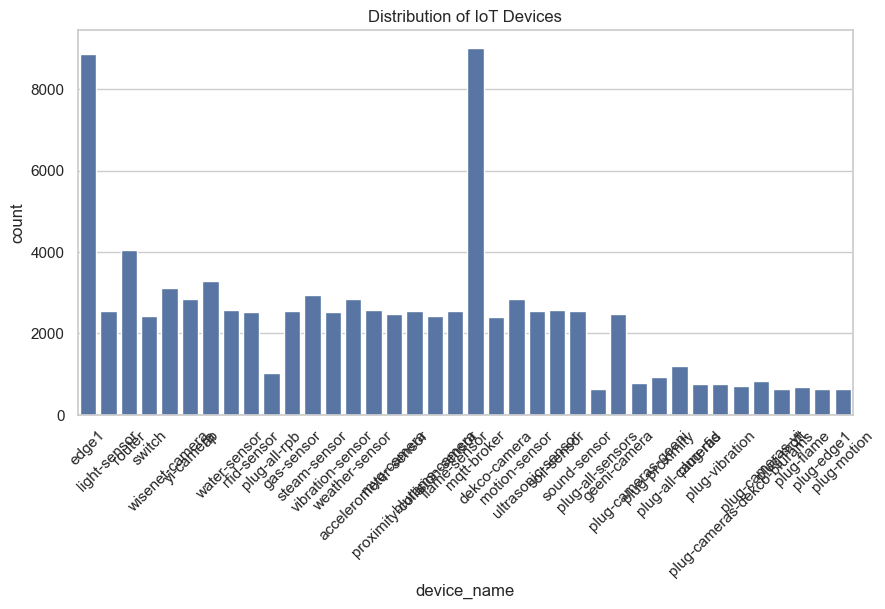

In [56]:

# Distribution of attack types
plt.figure(figsize=(10,5))
sns.countplot(x='label2', data=attack_df, order=attack_df['label2'].value_counts().index)
plt.title('Distribution of Attack Types (label2)')
plt.xticks(rotation=45)
plt.show()

# Distribution of devices
plt.figure(figsize=(10,5))
sns.countplot(x='device_name', data=attack_df)
plt.title('Distribution of IoT Devices')
plt.xticks(rotation=45)
plt.show()


In [66]:
attack_df.loc[attack_df["device_name"] == "water-sensor", "device_name"].count()


np.int64(2565)